# horror_spooky_eda

## 这部分做最基础的统计特征挖掘

In [1]:
import pandas as pd
filepath = 'C:/Users\Administrator\Desktop/'

In [2]:
train_data = pd.read_csv(filepath+'train.csv')
train_data.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
train_data.isnull().sum()

id        0
text      0
author    0
dtype: int64

In [5]:
train_data.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id18000,"""You are in the wrong,"" replied the fiend; ""an...",EAP
freq,1,1,7900


#### 训练集一个有19579条记录，没有缺失值。第一列是unique_id，第二列是一句文本，第三列是作者。作者一共有三个，分别是EAP,HPL和MWS。从frequence来看，训练集中的样本可能是分布不均的。同时，训练集的id有可能可以作为提高模型结果的trick。

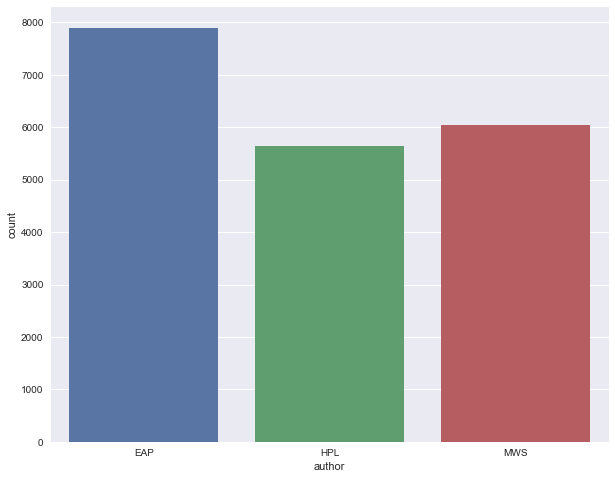

In [8]:
#先确认训练集的样本分布
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(10,8))
sns.countplot(train_data.author)
plt.show()

In [9]:
train_data.groupby(train_data.author).id.count()

author
EAP    7900
HPL    5635
MWS    6044
Name: id, dtype: int64

####  不确定这个分布需不需要做调整。接下来看看每个作者写的句子长度有没有差异。

In [10]:
train_data['text_split'] = train_data.text.apply(lambda x:x.split())

In [11]:
train_data['text_len'] = train_data.text_split.apply(lambda x: len(x))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


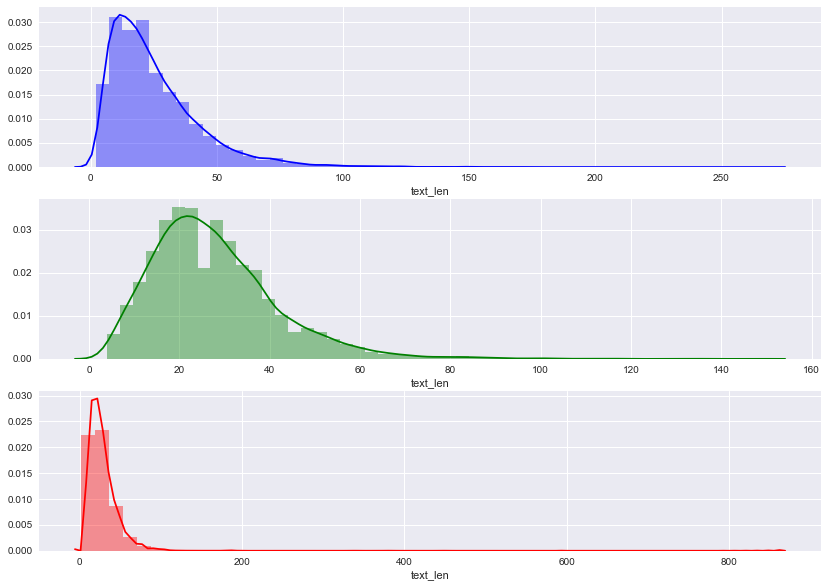

In [12]:
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(311)
sns.distplot(train_data[train_data.author=='EAP'].text_len,color='blue',ax=ax1)
ax2 = f.add_subplot(312)
sns.distplot(train_data[train_data.author=='HPL'].text_len,color='green',ax=ax2)
ax3 = f.add_subplot(313)
sns.distplot(train_data[train_data.author=='MWS'].text_len,color='red',ax=ax3)
plt.show()

#### 可以看出超长句子（len>=300）基本可以判断为MWS的句子，也许可以作为一个特征值。但这个超长句子也可能是异常值，还需要看看去除异常值后句子长度的分布差异。同时看到，三个作家的句子长度都是右偏的。这可能是人类写作的一个正常分布？但HPL的左偏程度非常小，可能是HPL的写作方式和别人不一样，打字机、电脑、写字。也许这个特征也可以用起来？

In [13]:
# 先打印所有的超长句子看看,共有五条，全部是MWS
train_data[train_data.text_len>=300]

,id,text,author,text_split,text_len
3956,id20439,To chambers of painted state farewell To midni...,MWS,"[To, chambers, of, painted, state, farewell, T...",377
4184,id20549,As for those who in your world knew not the lo...,MWS,"[As, for, those, who, in, your, world, knew, n...",335
9215,id27184,Diotima approached the fountain seated herself...,MWS,"[Diotima, approached, the, fountain, seated, h...",861
10939,id13677,They are gone for ever great as my power is I ...,MWS,"[They, are, gone, for, ever, great, as, my, po...",445
18107,id17485,Oh no I will become wise I will study my own h...,MWS,"[Oh, no, I, will, become, wise, I, will, study...",594


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


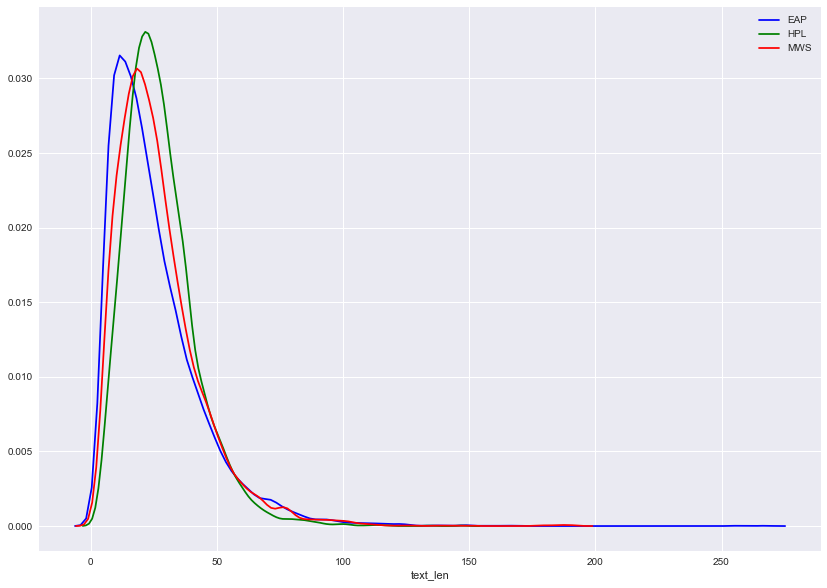

In [14]:
#去除这五条后的分布情况,好像没什么区别
f = plt.figure(figsize=(14,10))
sns.distplot(train_data[(train_data.author=='EAP')&(train_data.text_len<=300)].text_len,color='blue',label='EAP',hist=False)
sns.distplot(train_data[(train_data.author=='HPL')&(train_data.text_len<=300)].text_len,color='green',label='HPL',hist=False)
sns.distplot(train_data[(train_data.author=='MWS')&(train_data.text_len<=300)].text_len,color='red',label='MWS',hist=False)
plt.show()

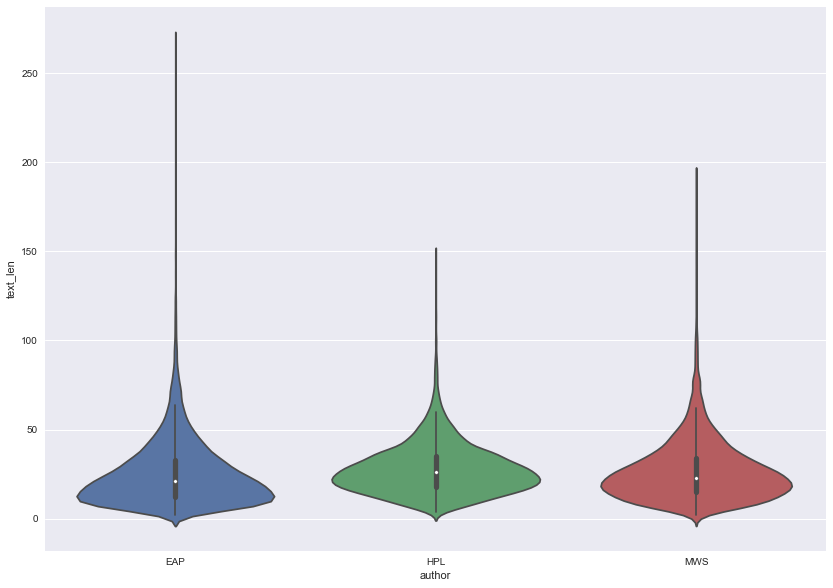

In [15]:
# 这么看可能还是有一些区别的，比如说EAP的句子长度会小一些
f = plt.figure(figsize=(14,10))
sns.violinplot(y=train_data[train_data.text_len<=300].text_len,x=train_data[train_data.text_len<=300].author)
plt.show()

In [16]:
# 再看看每个句子中单词平均长度的是否有显著差异
def mean_length(x):
    l = len(x)
    sum = 0
    for i in x:
        sum+=len(i)
    return sum/l
train_data['word_in_sentence_mean_length'] = train_data.text_split.apply(lambda x:mean_length(x))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


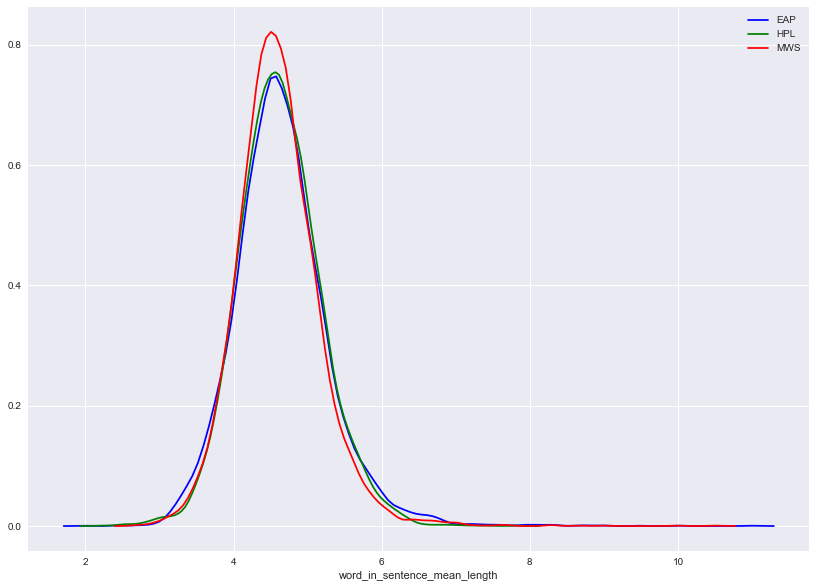

In [17]:
#看起来也很接近
f = plt.figure(figsize=(14,10))
sns.distplot(train_data[(train_data.author=='EAP')].word_in_sentence_mean_length,color='blue',label='EAP',hist=False)
sns.distplot(train_data[(train_data.author=='HPL')].word_in_sentence_mean_length,color='green',label='HPL',hist=False)
sns.distplot(train_data[(train_data.author=='MWS')].word_in_sentence_mean_length,color='red',label='MWS',hist=False)
plt.show()

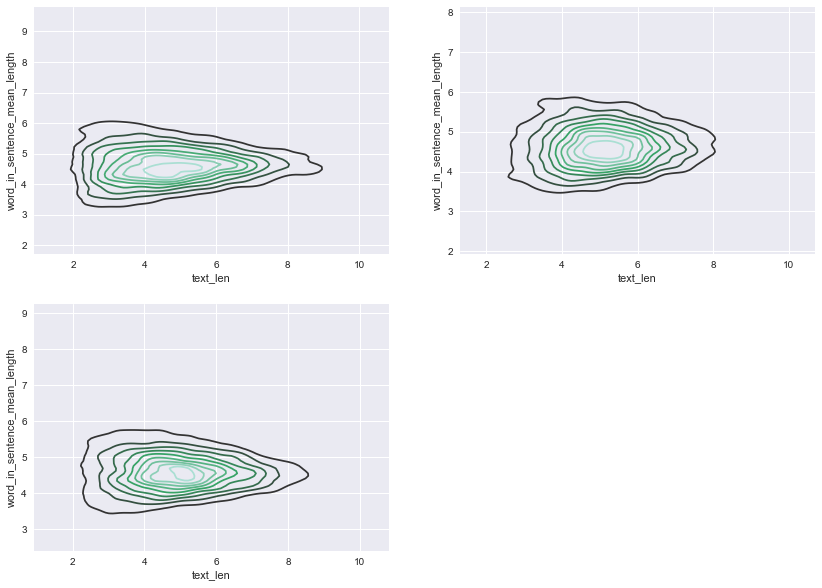

In [18]:
# x=文本长度，y=单词长度，看起来HPL的分布和其余两个作者明显不同
import math
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(221)
sns.kdeplot(train_data[(train_data.text_len<=100)&(train_data.author=='EAP')&(train_data.word_in_sentence_mean_length<10)].text_len.apply(lambda x:math.sqrt(x)),train_data[(train_data.text_len<=100)&(train_data.author=='EAP')&(train_data.word_in_sentence_mean_length<10)].word_in_sentence_mean_length,ax=ax1)
ax2 = f.add_subplot(222)
sns.kdeplot(train_data[(train_data.text_len<=100)&(train_data.author=='HPL')&(train_data.word_in_sentence_mean_length<10)].text_len.apply(lambda x:math.sqrt(x)),train_data[(train_data.text_len<=100)&(train_data.author=='HPL')&(train_data.word_in_sentence_mean_length<10)].word_in_sentence_mean_length,ax=ax2)
ax3 = f.add_subplot(223)
sns.kdeplot(train_data[(train_data.text_len<=100)&(train_data.author=='MWS')&(train_data.word_in_sentence_mean_length<10)].text_len.apply(lambda x:math.sqrt(x)),train_data[(train_data.text_len<=100)&(train_data.author=='MWS')&(train_data.word_in_sentence_mean_length<10)].word_in_sentence_mean_length,ax=ax3)
plt.show()

In [19]:
#然后看每个作者对标点符号的使用是否有区别
symbols = [',',"'",'.','!','?']
def sum_symbols(x):
    sum=0
    for i in x:
        if i in symbols:
            sum+=1
    return sum
train_data['symbol_num'] = train_data.text.apply(lambda x:sum_symbols(x))

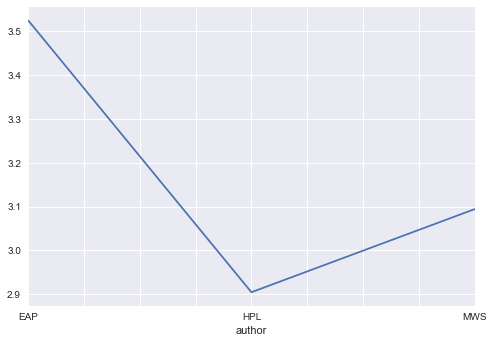

author
EAP    3.205990
HPL    2.814066
MWS    3.001001
Name: symbol_num, dtype: float64

In [24]:
#平均值区别还是挺大的,去掉极值后区别依然很大，但是极值对HPL没有影响
train_data.groupby(train_data.author).symbol_num.mean().plot()
plt.show()
train_data[train_data.symbol_num<=10].groupby(train_data.author).symbol_num.mean()

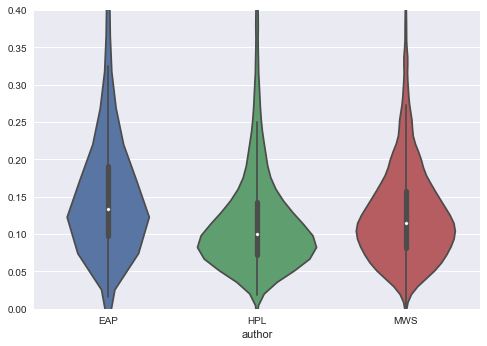

In [37]:
# 上面没有用标点密度，这样可能会手句子长度影响。去除极值后差异不怎么明显
train_data['symbols_density'] = train_data.symbol_num/train_data.text_len
sns.violinplot(y=train_data.symbols_density,x=train_data.author)
plt.ylim(0,0.4)
plt.show()

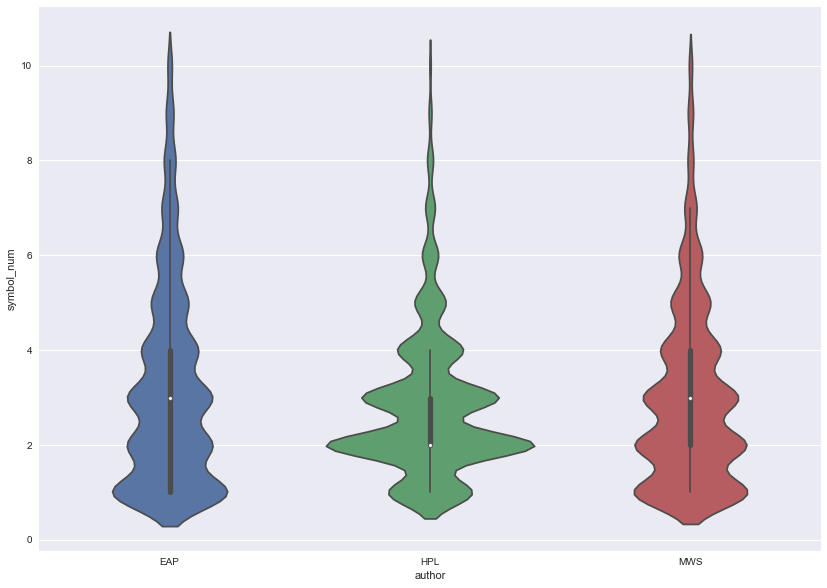

In [21]:
#使用的标点符号数量也许可以作为一个特征
f = plt.figure(figsize=(14,10))
sns.violinplot(x=train_data[train_data.symbol_num<=10].author,y=train_data[train_data.symbol_num<=30].symbol_num)
plt.show()

#### 让李德茏做了每个标点的密度。发现HPL使用标点符号的习惯明显和其他两个作家不同。问号的频率更低，引号的频率更高。目前想了两种可能，HPL中对话出现的次数更多、或者引用的东西更多，这部分内容可以继续挖掘。

In [27]:
all_word = train_data.text.str.split(expand=True).unstack().value_counts()

In [7]:
all_word[0:50].keys()

Index(['the', 'of', 'and', 'to', 'I', 'a', 'in', 'was', 'that', 'my', 'had',
       'with', 'his', 'as', 'he', 'it', 'for', 'which', 'not', 'at', 'from',
       'by', 'is', 'but', 'on', 'be', 'The', 'were', 'have', 'me', 'this',
       'her', 'all', 'or', 'an', 'no', 'you', 'so', 'been', 'one', 'we',
       'upon', 'could', 'its', 'would', 'when', 'they', 'their', 'more',
       'him'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import math
import numpy as np

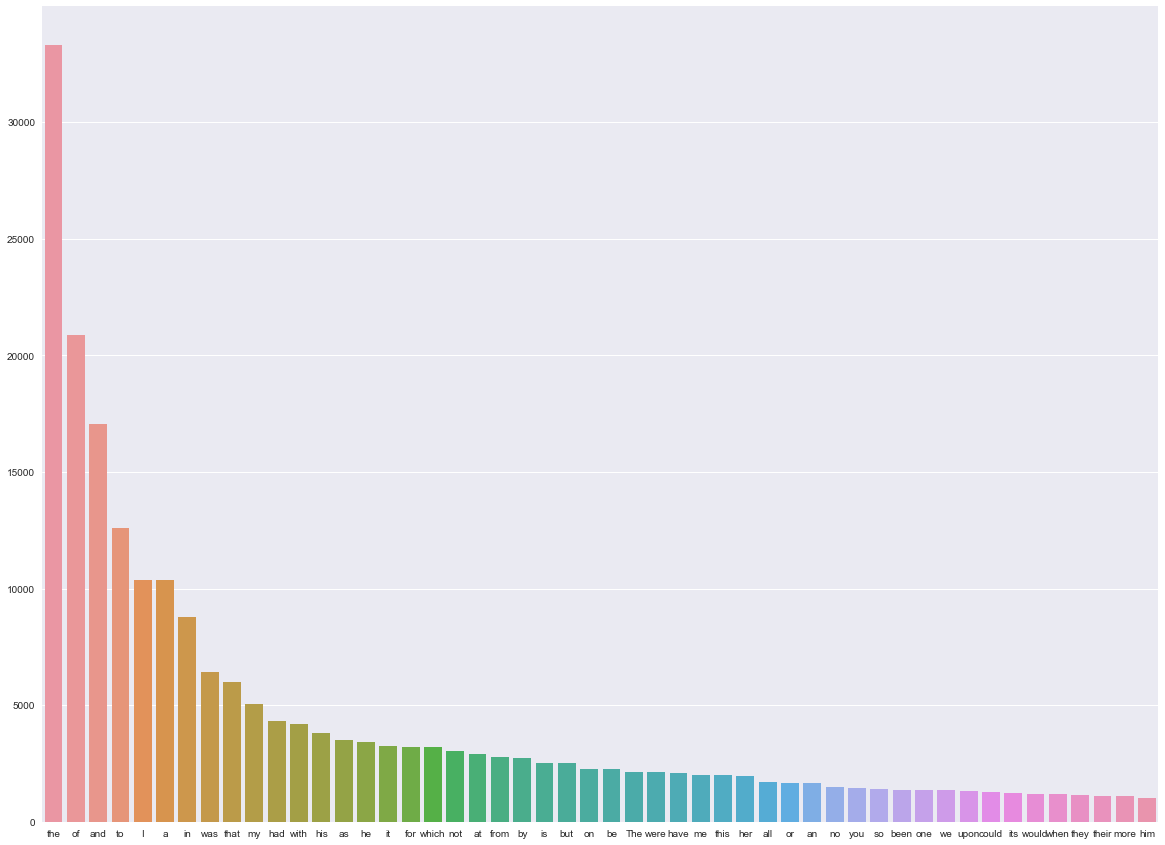

In [15]:
# 在这里没有做任何处理，比如大小写、停用词这些东西
# 这里对词频做了log
f = plt.figure(figsize=(20,15))
sns.barplot(y=all_word[0:50].values,x=all_word[0:50].keys())
plt.show()

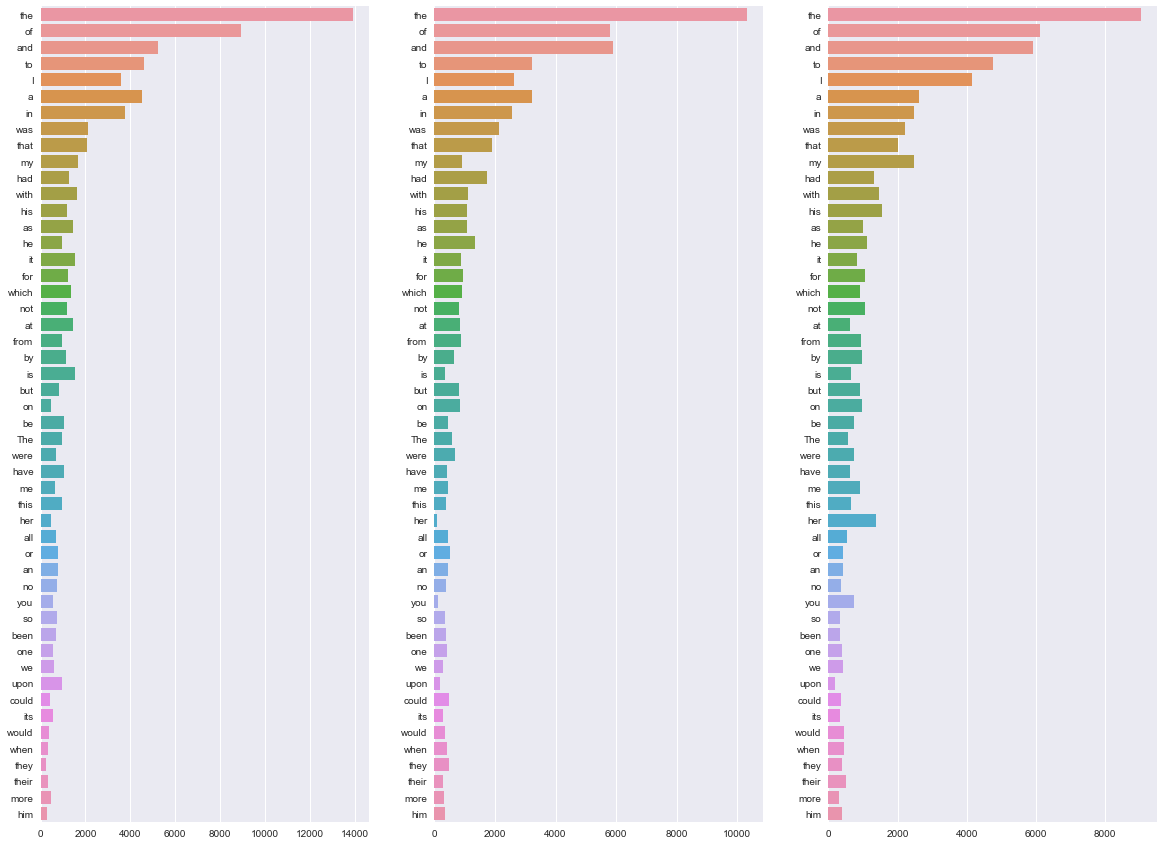

In [16]:
#然后分别看看三个作者，依然没有去掉stopword
#这张图的横坐标是词频，纵坐标是总样本中出现的前五十个word
eap_word = train_data[train_data.author=='EAP'].text.str.split(expand=True).unstack().value_counts()
hpl_word = train_data[train_data.author=='HPL'].text.str.split(expand=True).unstack().value_counts()
mws_word = train_data[train_data.author=='MWS'].text.str.split(expand=True).unstack().value_counts()
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(131)
sns.barplot(y=all_word[0:50].keys(),x=eap_word[all_word[0:50].keys()],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=all_word[0:50].keys(),x=hpl_word[all_word[0:50].keys()],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=all_word[0:50].keys(),x=mws_word[all_word[0:50].keys()],ax=ax3)
plt.show()

# 最好能再多找几个特征出来，因为一把stopwords去掉很多有意思的特征就没了。
****
### 这么看起来好像看不出有什么使用词语上的差异（虽然这么说，但是有些特征还是很明显的，比如说MWS使用her的频次比其他两个作家要高许多，这说明他的作品里面可能会涉及到较多的女性（女性向？）；还有my的频次差异，可能是第一视角作品比较多，感觉MWS在人称me,my,you,her这种东西上频次明显高出不少）。
### 接下来去掉一些stopwords后再来做这个操作。然后我们就要开始使用nltk这个包了，使用nltk后也可以减小前面几部分词中的误差。

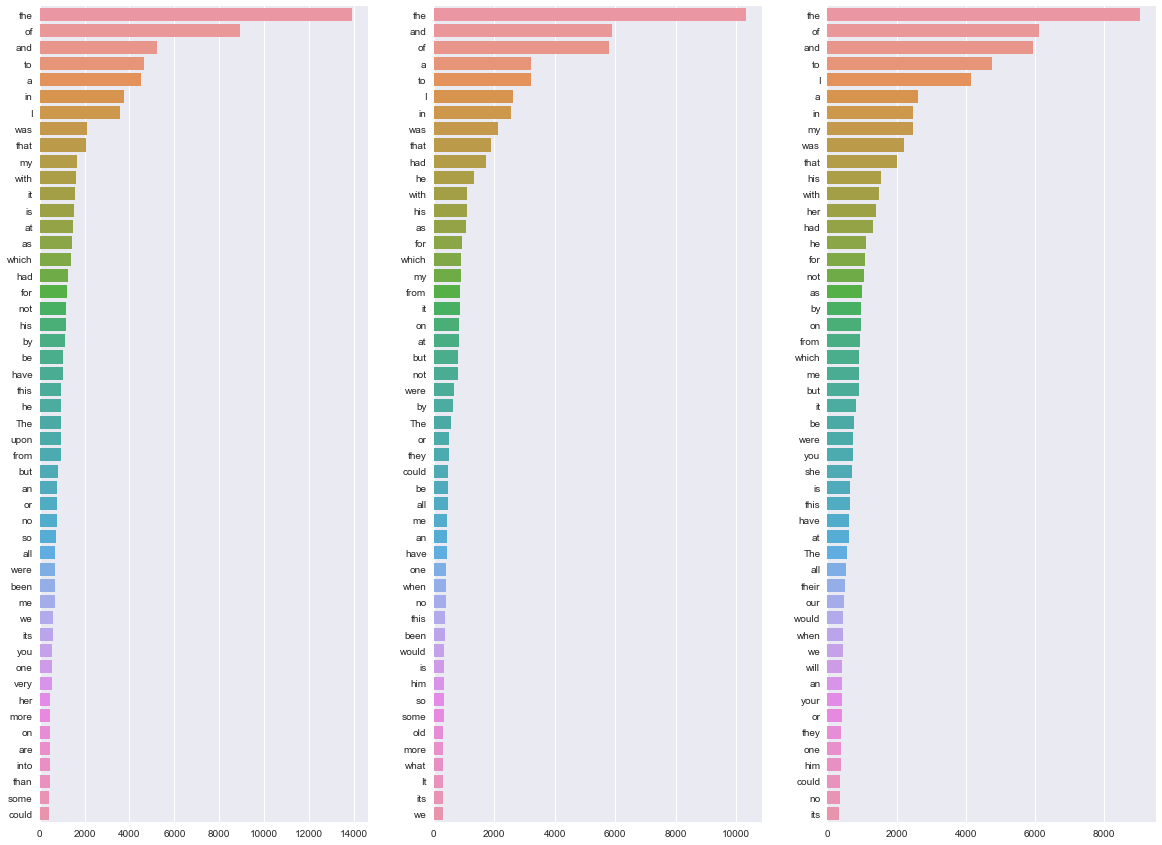

In [42]:
# 这张图的横坐标是词频，纵坐标是每个作家文本中频率最高的50个word,所以可以看一下和上图有什么区别。看看每个作家有
# 没有什么特殊的用词习惯
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_word[0:50].keys(),x=eap_word[0:50].values,ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_word[0:50].keys(),x=hpl_word[0:50].values,ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_word[0:50].keys(),x=mws_word[0:50].values,ax=ax3)
plt.show()

In [4]:
import nltk

###  遇到一个问题，anaconda提供的nltk都过时了，需要用nltk.download()更新

In [5]:
train_data['word_split'] = train_data.text.apply(lambda x:nltk.word_tokenize(str(x)))

In [6]:
train_data['word_tag'] = train_data.word_split.apply(lambda x:nltk.pos_tag(x))

In [9]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [7]:
def get_tag(x):
    a = {}
    for i in x:
        if str(i[1]) not in a:
            a[str(i[1])]=0
        else:
            a[str(i[1])]+=1
    return a
train_data['tag'] = train_data.word_tag.apply(lambda x:get_tag(x))

In [14]:
train_data.word_tag

0        [(This, DT), (process, NN), (,, ,), (however, ...
1        [(It, PRP), (never, RB), (once, RB), (occurred...
2        [(In, IN), (his, PRP$), (left, JJ), (hand, NN)...
3        [(How, WRB), (lovely, RB), (is, VBZ), (spring,...
4        [(Finding, VBG), (nothing, NN), (else, RB), (,...
5        [(A, DT), (youth, NN), (passed, VBN), (in, IN)...
6        [(The, DT), (astronomer, NN), (,, ,), (perhaps...
7        [(The, DT), (surcingle, NN), (hung, NN), (in, ...
8        [(I, PRP), (knew, VBD), (that, IN), (you, PRP)...
9        [(I, PRP), (confess, VBP), (that, IN), (neithe...
10       [(He, PRP), (shall, MD), (find, VB), (that, IN...
11       [(Here, RB), (we, PRP), (barricaded, VBD), (ou...
12       [(Herbert, NNP), (West, NNP), (needed, VBD), (...
13       [(The, DT), (farm, NN), (like, IN), (grounds, ...
14       [(But, CC), (a, DT), (glance, NN), (will, MD),...
15       [(He, PRP), (had, VBD), (escaped, VBN), (me, P...
16       [(To, TO), (these, DT), (speeches, NNS), (they.